# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [2]:
missing_values = ["n/a", "na", "?", "--"]

filename = 'breast-cancer-wisconsin.data'
data = pd.read_csv(filename, header=None, na_values=missing_values)

data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


# 1. Data Split

In [3]:
def data_split(data, frac=0.8):

    train = data.sample(frac=frac, random_state=3)
    test = data.drop(train.index)

    return train, test


train, test = data_split(data)
print('Train Data Shape = {}\nTest  Data Shape = {}'.format(train.shape, test.shape))

Train Data Shape = (559, 11)
Test  Data Shape = (140, 11)


# 2. Data Preprocess
## 2.1 Remove ID Column
## 2.2 Seperate feature & label


In [4]:
def data_prepare(data, flag=1):
    if flag:
        data_x = pd.DataFrame(data.iloc[:, 1:-1])
        data_y = pd.DataFrame(data.iloc[:, -1:])

        data_y = pd.DataFrame(data_y.replace(to_replace=[2, 4], value=[0, 1]))
        return data_x, data_y.values
    else:
        data_x = pd.DataFrame(data.iloc[:, 1:])
        return data_x


df_train_x, train_y = data_prepare(train)
df_test_x, test_y = data_prepare(test)

# 2. Data Preprocess
## 2.3 Data type conversion
## 2.4 Missing value replace with mean

In [5]:
def preprocess(data):
    m, n = data.shape
    new_data = pd.DataFrame()

    for i in data:
        new_data[i] = data[i].astype('float32')
        new_data[i] = new_data[i].fillna(new_data[i].mean())
    new_data = np.concatenate([np.ones((m, 1)), new_data.values], axis=1)

    return new_data


train_x = preprocess(df_train_x)
test_x = preprocess(df_test_x)
print(train_x.shape, test_x.shape)

(559, 10) (140, 10)


In [6]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [7]:
def predict(x, theta):
    z = np.matmul(x, theta.T)
    return sigmoid(z)

# 3. Cost Calculation

In [8]:
def cost(x, y, theta):
    m, n = x.shape
    pred_val = predict(x, theta)
    error = (-1/m) * np.sum(y*np.log(pred_val)+(1-y)*np.log(1-pred_val))
    return error

# 4. Gradient Descent Optimization

In [9]:
def optimize(x, y, theta, alpha=0.001, epoch=100000, flag=0):
    """
        Set flag = 1 for plotting error curve
    """
    if flag:
        plt.figure(figsize=(10, 5))
        error_list = []

    m, n = x.shape

    for i in range(epoch):

        error = predict(x, theta)-y
        differentiate = np.matmul(error.T, x)
        theta -= (alpha*differentiate)/m

        if flag:
            error_list.append(cost(x, y, theta))
    if flag:
        plt.title('Error Curve')
        plt.plot(range(epoch), error_list, linewidth=3)
        plt.ylabel("Error")
        plt.xlabel("Epochs")
        plt.show()

    return theta

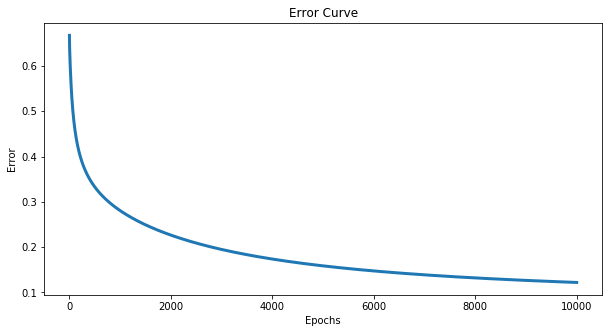

In [10]:
m, n = train_x.shape
theta = np.zeros((1, n))
theta = optimize(train_x, train_y, theta, 0.01, 10000, flag=1)

# 5. Decision Boundry

In [11]:
def decision(x, theta):
    y = predict(x, theta)
    return np.where(y >= 0.5, 1, 0)

# 6. Model Performance

In [12]:
def accuracy(test_x, tes_y, theta):
    TP, TN, FP, FN = 0, 0, 0, 0

    for i in range(len(test_x)):
        pred = decision(test_x[i], theta)
        if test_y[i] == pred:
            TP, TN = (TP, TN+1) if pred == 0 else (TP+1, TN)
        else:
            FP, FN = (FP, FN+1) if pred == 0 else (FP+1, FN)

    print("TP = {}\nTN = {}\nFP = {}\nFN = {}\n".format(TP, TN, FP, FN))

    precision = round(TP/(TP+FP)*100, 2)
    recall = round(TP/(TP+FN)*100, 2)
    f1_score = round((2*precision*recall)/(precision+recall), 2)
    accuracy = round((TP+TN)/(TP+TN+FP+FN)*100, 2)

    return 'Precision = {}%\nRecall    = {}%\nF1 Score  = {}%\nAccuracy  = {}%'.format(precision, recall, f1_score, accuracy)

In [13]:
print(accuracy(test_x, test_y, theta))

TP = 38
TN = 99
FP = 2
FN = 1

Precision = 95.0%
Recall    = 97.44%
F1 Score  = 96.2%
Accuracy  = 97.86%


# 7. Check Predicted Class Name

In [14]:
def output_class(row, theta):
    class_name = ['Benign', 'Malignant']
    result = decision(row, theta)
    return class_name[result[0]]


print("For test case {} Disease Name = {}".format(1, output_class(test_x[0, :], theta)))
print("For test case {} Disease Name = {}".format(11, output_class(test_x[10, :], theta)))

For test case 1 Disease Name = Benign
For test case 11 Disease Name = Malignant
